In [68]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from itertools import combinations
import seaborn as sns
import csv
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

In [69]:
file_path_1 = 'measures_v2.csv'
raw_dataset_1 = pd.read_csv(file_path_1, na_values='?', comment='\t', sep=',', skipinitialspace=True)
df = raw_dataset_1.copy()
df = df.drop('profile_id', axis=1)
print(df)

              u_q    coolant  stator_winding       u_d  stator_tooth  \
0       -0.450682  18.805172       19.086670 -0.350055     18.293219   
1       -0.325737  18.818571       19.092390 -0.305803     18.294807   
2       -0.440864  18.828770       19.089380 -0.372503     18.294094   
3       -0.327026  18.835567       19.083031 -0.316199     18.292542   
4       -0.471150  18.857033       19.082525 -0.332272     18.291428   
...           ...        ...             ...       ...           ...   
1330811 -2.152128  30.721298       45.274497  0.791801     41.934347   
1330812 -2.258684  30.721306       45.239017  0.778900     41.868923   
1330813 -2.130312  30.721312       45.211576  0.804914     41.804819   
1330814 -2.268498  30.721316       45.193508  0.763091     41.762220   
1330815 -2.100158  30.721319       45.132307  0.807309     41.734763   

         motor_speed       i_d       i_q         pm  stator_yoke    ambient  \
0           0.002866  0.004419  0.000328  24.554214    1

In [70]:
summary = df.describe()
print(df.dtypes)
print(df.info())
print(df.isnull().mean())
print(summary)
df = df.dropna()

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float

In [71]:
print(df.isnull().mean())
df['u_d'] = df['u_d'].astype(float)
print(df.dtypes)
print(df.info())
print(df.isnull().mean())
print(summary)

u_q               0.0
coolant           0.0
stator_winding    0.0
u_d               0.0
stator_tooth      0.0
motor_speed       0.0
i_d               0.0
i_q               0.0
pm                0.0
stator_yoke       0.0
ambient           0.0
torque            0.0
dtype: float64
u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64


In [72]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-1.238979,-0.799812,-1.648158,0.392820,-1.681117,-1.184128,1.058337,-0.405855,-1.786837,-1.494244,-2.443386,-0.400838
1,-1.236150,-0.799197,-1.647959,0.393521,-1.681047,-1.184129,1.058278,-0.405867,-1.787686,-1.494323,-2.443396,-0.400082
2,-1.238757,-0.798729,-1.648064,0.392464,-1.681078,-1.184128,1.058289,-0.405854,-1.787338,-1.493755,-2.443404,-0.400974
3,-1.236180,-0.798417,-1.648285,0.393356,-1.681146,-1.184126,1.058270,-0.405836,-1.786847,-1.493529,-2.443409,-0.400174
4,-1.239442,-0.797432,-1.648303,0.393101,-1.681195,-1.184127,1.057279,-0.405455,-1.786248,-1.493738,-2.443413,-0.400565
...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-1.277497,-0.252853,-0.734801,0.410918,-0.651102,-1.184129,1.027466,-0.393952,0.191617,-0.476927,-0.298612,-0.403264
1330812,-1.279909,-0.252853,-0.736038,0.410713,-0.653952,-1.184128,1.027461,-0.393952,0.191347,-0.476796,-0.308136,-0.403264
1330813,-1.277003,-0.252853,-0.736995,0.411126,-0.656745,-1.184128,1.027480,-0.393939,0.191122,-0.477067,-0.304750,-0.403264
1330814,-1.280131,-0.252852,-0.737626,0.410463,-0.658601,-1.184126,1.027453,-0.393972,0.190861,-0.476829,-0.292215,-0.403264


In [73]:
y = df['stator_tooth'].copy()
X = df.drop('stator_tooth', axis=1)

In [74]:
variance = df.var()
covariance_matrix = df.cov()
print(variance)
print(covariance_matrix)

u_q               1.000001
coolant           1.000001
stator_winding    1.000001
u_d               1.000001
stator_tooth      1.000001
motor_speed       1.000001
i_d               1.000001
i_q               1.000001
pm                1.000001
stator_yoke       1.000001
ambient           1.000001
torque            1.000001
dtype: float64
                     u_q   coolant  stator_winding       u_d  stator_tooth  \
u_q             1.000001  0.051721        0.050610  0.004702      0.104373   
coolant         0.051721  1.000001        0.504836  0.195517      0.674974   
stator_winding  0.050610  0.504836        1.000001 -0.234950      0.970135   
u_d             0.004702  0.195517       -0.234950  1.000001     -0.142750   
stator_tooth    0.104373  0.674974        0.970135 -0.142750      1.000001   
motor_speed     0.683557  0.011872        0.432034 -0.288472      0.398431   
i_d            -0.100357  0.074865       -0.624370  0.448331     -0.487062   
i_q            -0.124589 -0.256389   

In [ ]:
PCA_Entire = np.dot(df.T, df)
print(PCA_Entire)

PCA_Entire_Covariance_XTX = PCA_Entire/1330816
print(PCA_Entire_Covariance_XTX)

PCA_Entire_Correlation_Matrix = df.corr()
print(PCA_Entire_Correlation_Matrix)

eigenvalues, eigenvectors = np.linalg.eig(PCA_Entire_Covariance_XTX)
print(eigenvalues)

[[ 1330816.            68831.12908727    67352.36683323     6257.17648559
    138901.57141564   909687.27528114  -133556.6752792   -165805.20962894
    162844.82125937   121093.64167976   199974.13903008  -181276.97784972]
 [   68831.12908727  1330816.           671842.74425538   260197.16329733
    898265.65405211    15799.88436394    99631.27177258  -341206.53760634
    621647.20231269  1145500.2510186    699960.35319472  -343327.10707332]
 [   67352.36683323   671842.74425538  1330816.          -312675.4904811
   1291070.80317821   574957.6245841   -830921.0896722     87324.36354804
   1059186.49127302  1144858.89270029   443438.95574593   127106.08300265]
 [    6257.17648559   260197.16329733  -312675.4904811   1330816.
   -189973.30258497  -383903.14800387   596645.76965377  -962271.70078658
   -228941.05200618   -10776.88465631   271017.1309944  -1003141.16738102]
 [  138901.57141564   898265.65405211  1291070.80317821  -189973.30258497
   1330816.00000001   530238.01505876  -648

In [76]:
R2 = eigenvalues/np.sum(eigenvalues)
print(R2)

R2_cum = np.cumsum(R2)
print(R2_cum)

[4.05463165e-01 2.62203612e-01 1.44847532e-01 7.41324095e-02
 4.91147973e-02 2.27138974e-02 2.84051657e-02 9.45290113e-03
 2.97708975e-03 4.83332781e-04 1.52533218e-04 5.35646324e-05]
[0.40546317 0.66766678 0.81251431 0.88664672 0.93576152 0.95847541
 0.98688058 0.99633348 0.99931057 0.9997939  0.99994644 1.        ]


In [ ]:
XTX = np.dot(X.T, X)
print(XTX)

Covariance_XTX = XTX/1330816
print(Covariance_XTX)

Correlation_Matrix = X.corr()
print(Correlation_Matrix)

eigenvalues, eigenvectors = np.linalg.eig(Covariance_XTX)
print(eigenvalues)

[[ 1330816.            68831.12908727    67352.36683323     6257.17648559
    909687.27528114  -133556.6752792   -165805.20962894   162844.82125937
    121093.64167976   199974.13903008  -181276.97784972]
 [   68831.12908727  1330816.           671842.74425538   260197.16329733
     15799.88436394    99631.27177258  -341206.53760634   621647.20231269
   1145500.2510186    699960.35319472  -343327.10707332]
 [   67352.36683323   671842.74425538  1330816.          -312675.4904811
    574957.6245841   -830921.0896722     87324.36354804  1059186.49127302
   1144858.89270029   443438.95574593   127106.08300265]
 [    6257.17648559   260197.16329733  -312675.4904811   1330816.
   -383903.14800386   596645.76965377  -962271.70078658  -228941.05200618
    -10776.88465631   271017.1309944  -1003141.16738102]
 [  909687.27528114    15799.88436394   574957.6245841   -383903.14800386
   1330816.          -932381.00452002   -91667.30516688   610774.11562238
    340409.25385185   157345.22124242   -

Looking at the eigenvectors produced using the PCA technique, it represents the R2 for each component. It provides an idea of how correlated a set of x variables are through how many components is required to explain the entire dataset. If a dataset contains 20 features and requires only 2 principal components to achieve a 90% R2, then it means that they features are highly correlated through 2 perpendicular linear regression lines. Looking at the dataset to explain stator tooth, it requires only 4 components to explain 96.29% of the data. If modelling the dataset becomes computationally expensive, then the dataset can be reduced to these 4 principal components.

In [78]:
R2 = eigenvalues/np.sum(eigenvalues)
print(R2)

R2_cum = np.cumsum(R2)
print(R2_cum)

[3.59615766e-01 2.85141750e-01 1.54747914e-01 8.04682086e-02
 5.20053761e-02 2.38231304e-02 3.09873910e-02 9.38124506e-03
 3.17441679e-03 4.88728646e-04 1.66073437e-04]
[0.35961577 0.64475752 0.79950543 0.87997364 0.93197901 0.95580215
 0.98678954 0.99617078 0.9993452  0.99983393 1.        ]


In [79]:
loading_1 = (eigenvectors[0, :].reshape(1,-1))*-1
loading_2 = (eigenvectors[1, :].reshape(1,-1))*-1
print(loading_1)
print(loading_2)

[[-0.14556007 -0.00112772 -0.56450829 -0.61050145 -0.18217682  0.2447063
   0.00139522 -0.18751069  0.39738882  0.0356482  -0.00298665]]
[[-0.34754586  0.18499286  0.32635208 -0.29631316 -0.38619998 -0.46468784
   0.06773455  0.32762623  0.10908939  0.40199927  0.01289606]]


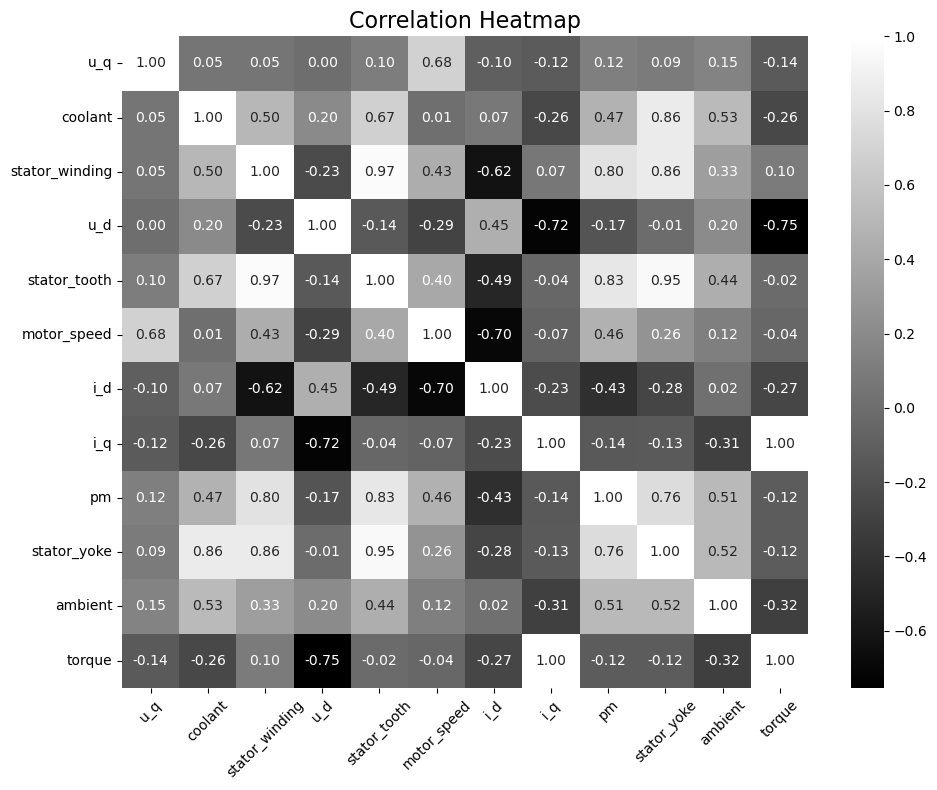

In [80]:
variables = df.columns
plt.figure(figsize=(10, 8))
sns.heatmap(
    PCA_Entire_Correlation_Matrix,
    annot=True,
    fmt=".2f",
    xticklabels=variables,
    yticklabels=variables,
    cmap="grey",
    cbar=True
)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

The correlation matrix above represents the entire dataset and their correlations excluding profile ID. Below is a matrix providing a list of the most correlated features along with which features are most correlated to to our observation, stator tooth. Between Features, IQ (current in the q coordinate) and Torque are the only 2 variables with a correlation higher than 90% and are the highest correlated features at 99.6%. It makes sense that IQ and torque are highly correlated since current and voltage in the d and q coordinate are tuned through optimization programs to achieve the highest torque values. The only other correlations that are higher than 90% are features correlated with the observations. Stator tooth and stator winding are 97% with stator tooth and stator york is 95%. This also makes sense since stator tooth temperature is related to the operations within the stator such as the yoke and winding. 

In [81]:
corr_pairs = (
    PCA_Entire_Correlation_Matrix.where(np.triu(np.ones(PCA_Entire_Correlation_Matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]
corr_pairs = corr_pairs.reindex(corr_pairs["Correlation"].abs().sort_values(ascending=False).index)
print(corr_pairs)

         Feature 1     Feature 2  Correlation
59             i_q        torque     0.996457
22  stator_winding  stator_tooth     0.970135
42    stator_tooth   stator_yoke     0.953115
18         coolant   stator_yoke     0.860750
27  stator_winding   stator_yoke     0.860268
..             ...           ...          ...
44    stator_tooth        torque    -0.018413
54             i_d       ambient     0.016397
14         coolant   motor_speed     0.011872
35             u_d   stator_yoke    -0.008098
2              u_q           u_d     0.004702

[66 rows x 3 columns]


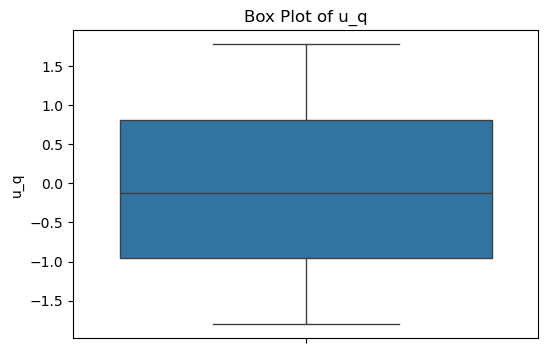

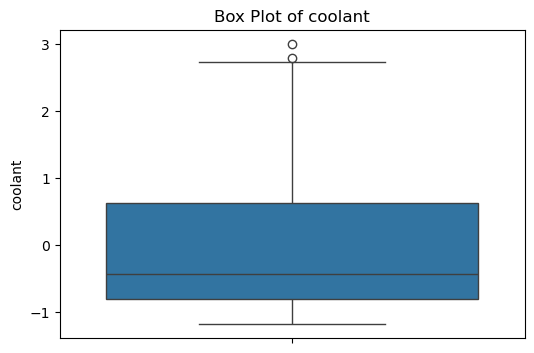

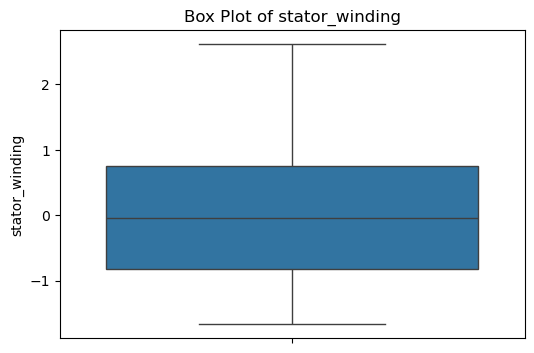

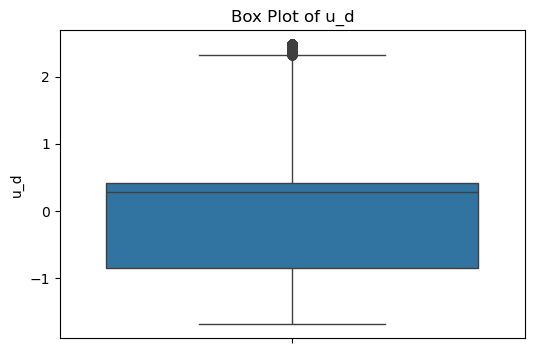

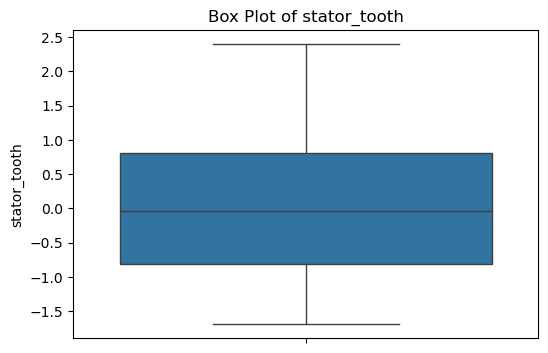

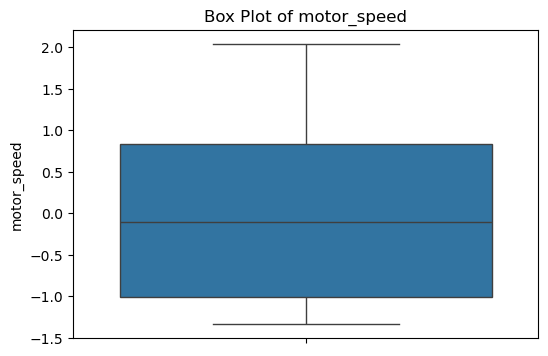

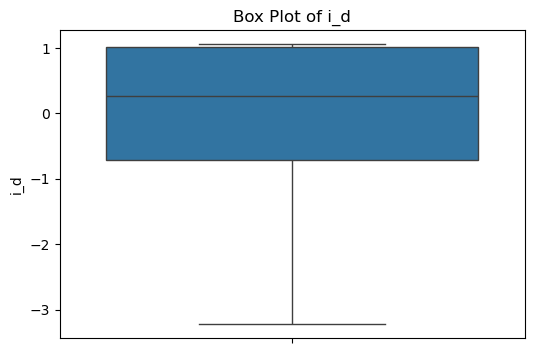

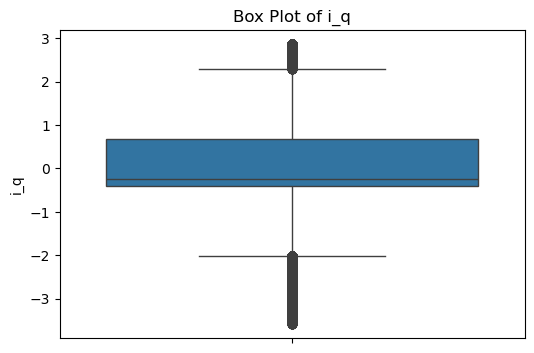

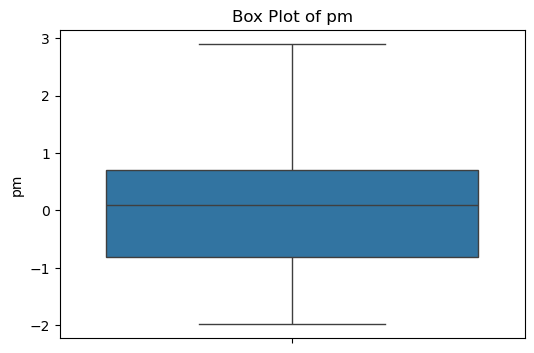

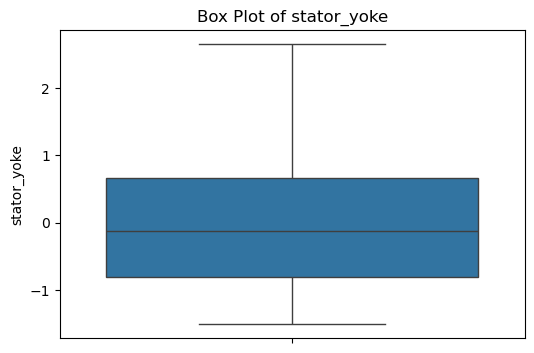

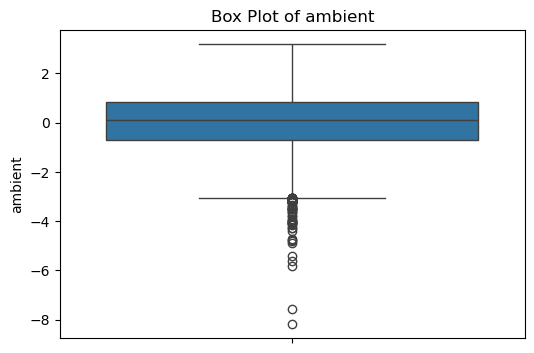

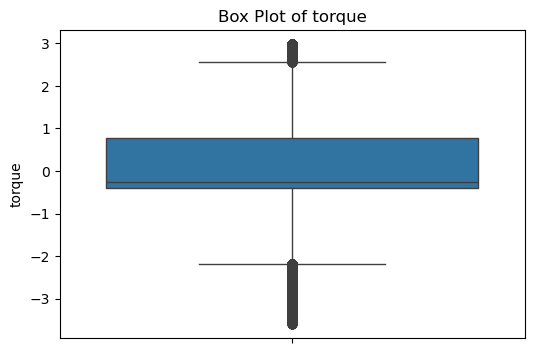

In [82]:
for column in df.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(6, 4))  # Set the figure size
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

It is important to take note of the outliers achieved within these box plots. IQ, Torque, and ambient temperature are the 3 variable with the most amount of outliers as indicated by the smaller box plot and the more dispersed range of datapoints. IQ and torque being similarly represented follows suit with the 2 variables being highly correlated. Ambient temperature on the other hand tends to operate cooler due to its more negative values which may indicate that the process was operating more optimially when the conditions of the motor were colder.  

Optimal number of features: 11


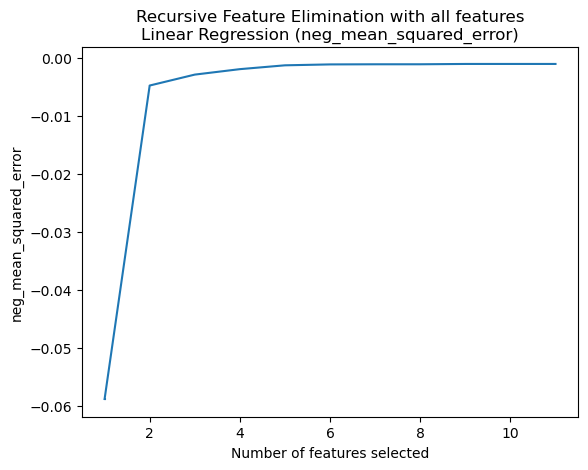

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]
Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'motor_speed', 'i_d', 'i_q',
       'pm', 'stator_yoke', 'ambient', 'torque'],
      dtype='object')



In [ ]:
min_features_to_select = 1 
clf = LinearRegression()
cv = RepeatedKFold()

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("neg_mean_squared_error")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with all features\nLinear Regression (neg_mean_squared_error)")
plt.show()

print(rfecv.support_)
print(rfecv.ranking_)
print(X.columns)
print()

In [84]:
mean_scores = rfecv.cv_results_["mean_test_score"]
features = list(X.columns)
ranking = np.array(rfecv.ranking_)

sorted_indices = np.argsort(ranking)
sorted_features = np.array(features)[sorted_indices]

selected_features = list(sorted_features)

print("Feature Selection Process:\n")
for num_features in range(1, len(features) + 1):
    score = mean_scores[num_features - 1]

    print(f"With {num_features} features, Score = {score:.4f}")
    print(f"Selected Features: {selected_features[:num_features]}")
    print("-" * 50)

Feature Selection Process:

With 1 features, Score = -0.0588
Selected Features: ['u_q']
--------------------------------------------------
With 2 features, Score = -0.0048
Selected Features: ['u_q', 'coolant']
--------------------------------------------------
With 3 features, Score = -0.0029
Selected Features: ['u_q', 'coolant', 'stator_winding']
--------------------------------------------------
With 4 features, Score = -0.0020
Selected Features: ['u_q', 'coolant', 'stator_winding', 'u_d']
--------------------------------------------------
With 5 features, Score = -0.0013
Selected Features: ['u_q', 'coolant', 'stator_winding', 'u_d', 'motor_speed']
--------------------------------------------------
With 6 features, Score = -0.0011
Selected Features: ['u_q', 'coolant', 'stator_winding', 'u_d', 'motor_speed', 'i_d']
--------------------------------------------------
With 7 features, Score = -0.0011
Selected Features: ['u_q', 'coolant', 'stator_winding', 'u_d', 'motor_speed', 'i_d', 'i_

Optimal number of features: 11


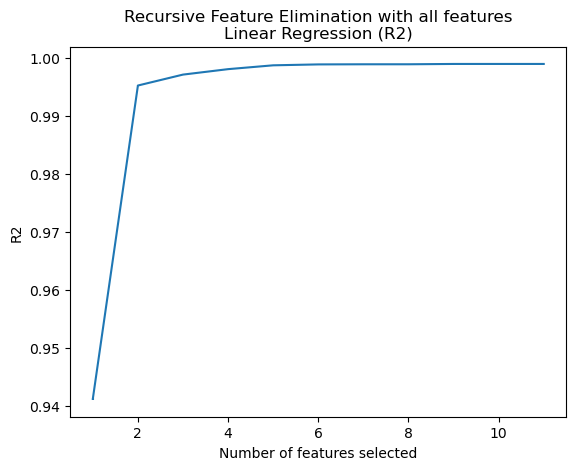

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]
Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'motor_speed', 'i_d', 'i_q',
       'pm', 'stator_yoke', 'ambient', 'torque'],
      dtype='object')



In [ ]:
min_features_to_select = 1
clf = LinearRegression()
cv = RepeatedKFold()

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("R2")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with all features\nLinear Regression (R2)")
plt.show()

print(rfecv.support_)
print(rfecv.ranking_)
print(X.columns)
print()

In [86]:
mean_scores = rfecv.cv_results_["mean_test_score"]
features = list(X.columns)
ranking = np.array(rfecv.ranking_)

sorted_indices = np.argsort(ranking)
sorted_features = np.array(features)[sorted_indices]

selected_features = list(sorted_features)

print("Feature Selection Process:\n")
for num_features in range(1, len(features) + 1):
    score = mean_scores[num_features - 1]

    print(f"With {num_features} features, Score = {score:.4f}")
    print(f"Selected Features: {selected_features[:num_features]}")
    print("-" * 50)

Feature Selection Process:

With 1 features, Score = 0.9412
Selected Features: ['u_q']
--------------------------------------------------
With 2 features, Score = 0.9952
Selected Features: ['u_q', 'coolant']
--------------------------------------------------
With 3 features, Score = 0.9971
Selected Features: ['u_q', 'coolant', 'stator_winding']
--------------------------------------------------
With 4 features, Score = 0.9980
Selected Features: ['u_q', 'coolant', 'stator_winding', 'u_d']
--------------------------------------------------
With 5 features, Score = 0.9987
Selected Features: ['u_q', 'coolant', 'stator_winding', 'u_d', 'motor_speed']
--------------------------------------------------
With 6 features, Score = 0.9989
Selected Features: ['u_q', 'coolant', 'stator_winding', 'u_d', 'motor_speed', 'i_d']
--------------------------------------------------
With 7 features, Score = 0.9989
Selected Features: ['u_q', 'coolant', 'stator_winding', 'u_d', 'motor_speed', 'i_d', 'i_q']
---

Looking at the 2 recursive feature elimination plots using a linear regression model above, it is clear that 2 variables dominate the prediction capabilities, u_q and coolant. Looking at u_q, this is not a total suprise since torque was the dominate observation within these trials. As the voltages adjust, so does the torque produced within the motor. To produce larger amount of torque, the stator teeth need to operate at faster RPM, producing more torque and the same vice versa. The second most important feature to improving the prediction scores onto stator tooth temperature would be coolant. This is an obvious feature since the temperature of the stator tooth would be directly correlated to coolant temperature being inserted into the system. 

In [ ]:
min_features_to_select = 1 
clf = RandomForestRegressor()
cv = RepeatedKFold()

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("R2")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with all features\nRandom Forrest Regression (R2)")
plt.show()

print(rfecv.support_)
print(rfecv.ranking_)
print(X.columns)
print()

In [ ]:
mean_scores = rfecv.cv_results_["mean_test_score"]
features = list(X.columns)
ranking = np.array(rfecv.ranking_)

sorted_indices = np.argsort(ranking)
sorted_features = np.array(features)[sorted_indices]

selected_features = list(sorted_features)

print("Feature Selection Process:\n")
for num_features in range(1, len(features) + 1):
    score = mean_scores[num_features - 1]

    print(f"With {num_features} features, Score = {score:.4f}")
    print(f"Selected Features: {selected_features[:num_features]}")
    print("-" * 50)